In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Funções para extrair acertos
A maioria das análises TRI vão precisar de uma "dicomitização" das respostas. A estrutura de dados que vamos precisar é uma matriz com colunas itens e linhas pessoas com valores 0 e 1 para erros e acertos respectivamente.

Vamos tentar criar umas funções que crie este estrutura de dados


In [112]:
df = pd.read_csv('data/enem19-1perc.csv')
list(df.columns)

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICA

In [113]:
df["TX_RESPOSTAS_CN"].sample(10)

18087    DEECEEBACBCDEDDCCAADAADDDEABBEDABCBCCACCCABDD
1630     DBADCDCEBDBCCECADEADAABDCCEDAEBEDCEBEADBDDAEE
17422    DDADEBBDECCACBACBCABBEDEBEDBDCDBADADBAEACDECC
13349    DA*BDEEBBCCCCBCBCBBCABCDDCABDADBCBAEDCCDDDCEE
21773    ACECCDCADEEEBCACBBCCCCEDECEDABECCBDCEAEDDDACC
24250    CAEDEDADEDBDECCADDCEDBADCBBBCDACCDECCCBEDBDDA
5730     DBCCCACDECDCBBCDBEABCBCDDBECEBBDABBDADDDDDDAE
17930    CACBDABDEEBEABCACEDDECBBEACBDDBECADCDDEBCAEEC
24312    BBDCADDDDDBCDABCAADBEDCABECCAEBADCAABAB*BCDBD
17676    ECECBCEEDDCBBDBDBABACADEABCADABEEBDCDEBCBBADA
Name: TX_RESPOSTAS_CN, dtype: object

In [114]:
df["TX_GABARITO_CN"].sample(10)

20483    DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE
29954    BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
26827    BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
19696    DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE
11882    DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE
11255    BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
13298    AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC
9398     DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC
16330    DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE
27697    AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC
Name: TX_GABARITO_CN, dtype: object

In [115]:
gab = df.loc[16562,"TX_GABARITO_CN"]
resp = df.loc[16562,"TX_RESPOSTAS_CN"]
print(resp)
print(gab)

ADCDEDBACEBECDEBAEECBBDDDBCDBEBBCACDA*ADBAACE
AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC


In [116]:
[r == g for r,g in zip(resp,gab)]

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False]

In [133]:
def to_acertos(s):
    'resp e gab são strings, retorna uma lista'
    resp = s[0]
    gab = s[1]
    return [r == g for r,g in zip(resp,gab)]

def acertos_df(df,exame,as_int=True):
    'Retorna dataframe com acertos. Colunas 1-45 = itens, Linhas = idx do df'
    resp_col = 'TX_RESPOSTAS_' + exame
    gab_col = 'TX_GABARITO_' + exame
    adf = df[[resp_col,gab_col]].apply(to_acertos,axis=1,result_type = "expand")
    adf['acertos'] = adf.sum(axis=1)
    adf['caderno'] = df.loc[:,"CO_PROVA_" + exame]
    if as_int:
        adf = adf.astype("int")
    adf['nota_inep'] = df.loc[:,"NU_NOTA_" + exame]
    return adf

In [135]:
acertos_df(df,'MT')

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,acertos,caderno,nota_inep
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,516,517.9
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,5,515,429.8
2,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,8,516,443.2
3,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,8,516,448.5
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,10,516,511.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31524,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,6,517,433.2
31525,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,10,517,521.0
31526,1,1,0,0,1,1,1,0,1,0,...,0,0,1,0,1,0,0,17,517,626.9
31527,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,517,551.8


In [136]:
ch = acertos_df(df,'CH')
mt = acertos_df(df,'MT')
cn = acertos_df(df,'CN')
lc = acertos_df(df,'LC')

In [147]:
ch.to_csv("data/ch19.csv",index=False)

In [138]:
lc.sort_values('acertos',ascending=True)[:20]

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,acertos,caderno,nota_inep
13926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,511,323.2
31056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,513,323.4
28379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,511,359.9
29201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,513,323.8
19210,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,512,324.9
12536,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,512,347.9
26658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,513,352.0
23858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,514,323.5
24261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,512,343.6
21762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,3,513,369.6


<AxesSubplot:xlabel='acertos', ylabel='nota_inep'>

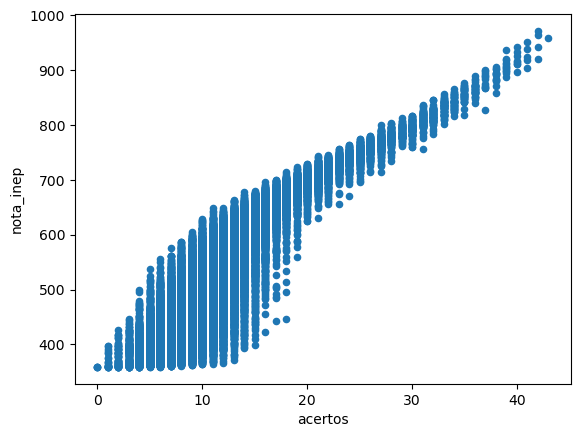

In [139]:
mt.plot(x='acertos',y='nota_inep',kind='scatter')